<a href="https://colab.research.google.com/github/se-an-alytics/nba_2021-2022_PER_Project/blob/main/2021_2022_NBA_Linear_Weighted_PER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import io
nba_df = pd.read_csv(io.BytesIO(uploaded['NBA_Player_Stats.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving NBA_Player_Stats.csv to NBA_Player_Stats.csv


In [3]:
# filter the dataset so we can focus on the most recent season
nba_22 = nba_df[nba_df['Year'] == '2021-2022']
nba_22

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13773,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2021-2022
13774,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-2022
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022
14570,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-2022
14571,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-2022


In [4]:
# now we want to filter down the number of players within this past season
# who have AT LEAST a combined 1,000 total minutes played.
nba_22 = nba_22[nba_22['MP'] * nba_22['G'] >= 1000]
nba_22

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13774,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022
13775,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14551,590,Ziaire Williams,SF,20,MEM,62,31,21.7,3.1,6.8,...,0.4,1.7,2.1,1.0,0.6,0.2,0.7,1.8,8.1,2021-2022
14558,595,Christian Wood,C,26,HOU,68,67,30.8,6.5,12.9,...,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,2021-2022
14560,597,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,...,0.6,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,2021-2022
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022


In [6]:
# just for curiosity purposes, I wanted to see the 10 players that made the
# >= 1,000 MP cut off by the smallest margins
nba_22_lowest_mpg = nba_22.groupby('MP')['Player'].min()
nba_22_lowest_mpg.head(10)

MP
14.1    Payton Pritchard
15.5          Josh Green
15.8        JaVale McGee
15.9      Dewayne Dedmon
16.0      Troy Brown Jr.
16.1       Lamar Stevens
16.2       Aaron Holiday
16.6           Tre Jones
16.9    Jonathan Kuminga
17.1         Bryn Forbes
Name: Player, dtype: object

In [13]:
# [ FGM x 85.910 + Steals x 53.897 + 3PTM x 51.757 + FTM x 46.845 + Blocks x 39.190 + Offensive_Reb x 39.190
# + Assists x 34.677 + Defensive_Reb x 14.707 - Foul x 17.174 - FT_Miss x 20.091 - FG_Miss x 39.190
# - TO x 53.897 ] x (1 / Minutes)
# formula obtained from: https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess
linear_weights_PER = (nba_22['FG'] * 85.910 + nba_22['STL'] * 53.897 + nba_22['3P'] * 51.757 + nba_22['FT'] * 46.845 +
                      nba_22['BLK'] * 39.190 + nba_22['ORB'] * 39.190 + nba_22['AST'] * 34.677 + nba_22['DRB'] * 14.707 - 
                      nba_22['PF'] * 17.174 - (nba_22['FTA'] - nba_22['FT']) * 20.091 - (nba_22['FGA'] - nba_22['FG'] * 39.190) -
                      nba_22['TOV'] * 53.897) * (1/nba_22['MP'])

nba_22['PER'] = linear_weights_PER
nba_highest_PER = nba_22.sort_values(by=['PER'], ascending=False)
nba_highest_PER.head(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER
13785,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,...,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,2021-2022,59.435371
14152,290,Nikola Jokić,C,26,DEN,74,74,33.5,10.3,17.7,...,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,2021-2022,58.657528
13967,162,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,...,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,2021-2022,57.932024
14287,390,Ja Morant,PG,22,MEM,57,57,33.1,10.2,20.6,...,4.4,5.7,6.7,1.2,0.4,3.4,1.5,27.4,2021-2022,53.709773
14129,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021-2022,53.343554
13939,141,Luka Dončić,PG,22,DAL,65,65,35.4,9.9,21.6,...,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,2021-2022,52.779545
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-2022,52.384931
13959,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9,2021-2022,51.357812
13831,59,Devin Booker,SG,25,PHO,68,68,34.5,9.7,20.9,...,4.4,5.0,4.8,1.1,0.4,2.4,2.6,26.8,2021-2022,49.080814
14276,383,Donovan Mitchell,SG,25,UTA,67,67,33.8,9.2,20.5,...,3.4,4.2,5.3,1.5,0.2,3.0,2.4,25.9,2021-2022,48.396586


In [14]:
import plotly.express as px
px.scatter(data_frame=nba_highest_PER, x='Age', y='PER', color='Pos',
           log_x=True, #hover_data=['Player'],
           title='Linear Weighted PER v. (TBD) in 2021-2022 NBA Season')

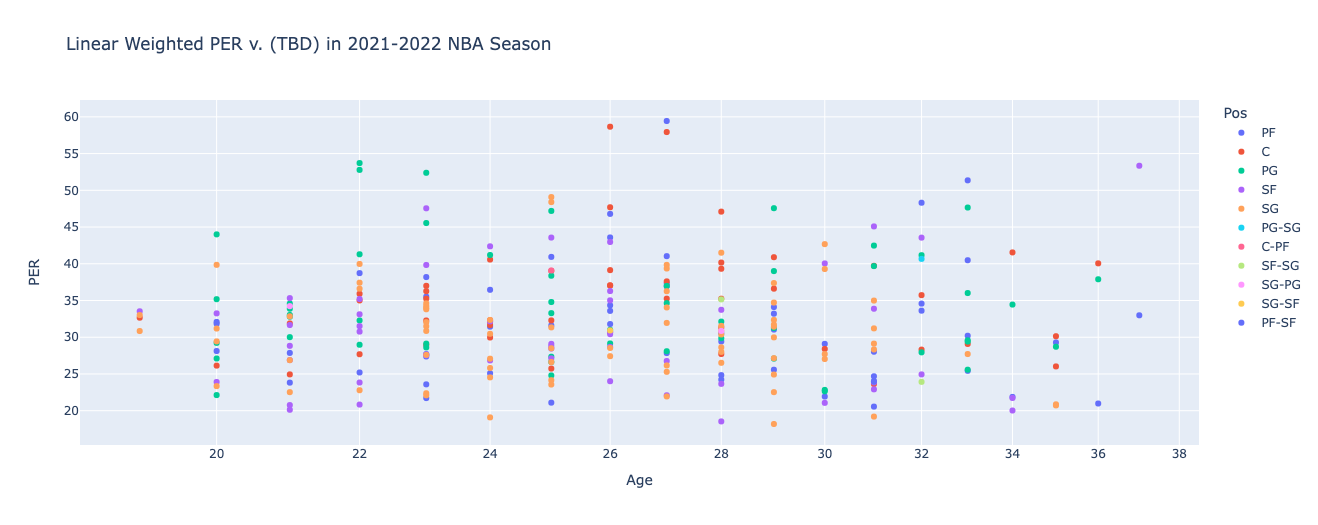